# Stroke prediciton

Stroke is ranked as the second leading cause of death and remains a huge public health burden despite the advancement in understanding of the disease. 

This dataset is used to identify insights about stroke predicitons based on the input parameters such as age, gender, smoking status, comorbidities.

In [21]:
# importing modules necessary for analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
# Load data from stroke_prediciton dataset
stroke_df = pd.read_csv('data/stroke_data.csv')

## Data summary

Better understanding of the data that we are working with.

In [23]:
# print a summary of a DataFrame
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [24]:
# Check first rows of dataset
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Descriptive statistics

Get a statistical summary of numerical variables like age, BMI, and glucose levels

In [25]:
stroke_df[['age', 'avg_glucose_level',  'bmi']].describe().round(2)

,age,avg_glucose_level,bmi
count,5110.00,5110.00,4909.00
mean,43.23,106.15,28.89
std,22.61,45.28,7.85
min,0.08,55.12,10.30
25%,25.00,77.24,23.50
50%,45.00,91.88,28.10
75%,61.00,114.09,33.10
max,82.00,271.74,97.60


## Outliers detection

<Axes: xlabel='age'>

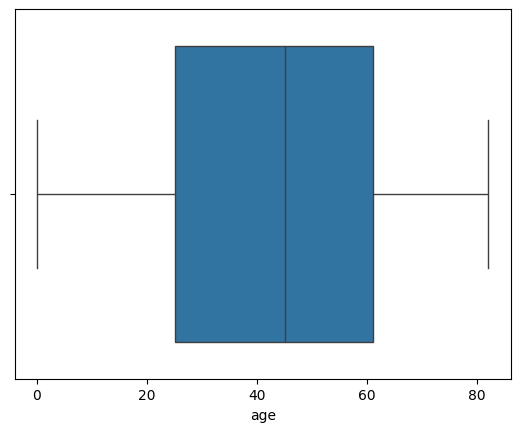

In [26]:
sns.boxplot(x='age', data=stroke_df)

<Axes: xlabel='avg_glucose_level'>

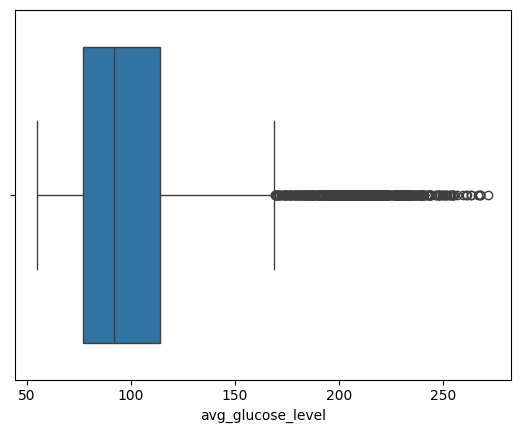

In [27]:
sns.boxplot(x='avg_glucose_level', data=stroke_df)

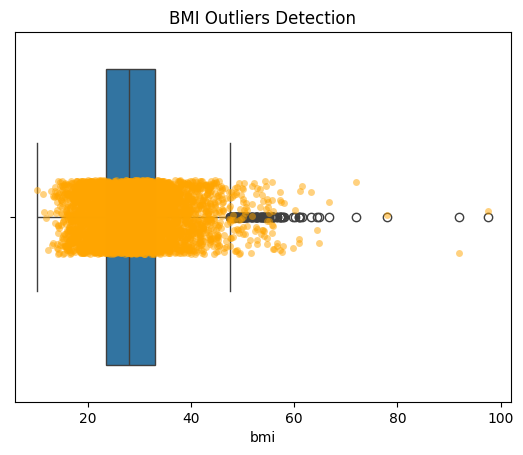

In [28]:
sns.boxplot(x='bmi', data=stroke_df)
sns.stripplot(x='bmi', data=stroke_df, color='orange', alpha=0.5, jitter=True)
plt.title('BMI Outliers Detection')
plt.show()


### Data consistency check

In [29]:
stroke_df.duplicated().sum()

np.int64(0)

## Relationships between features

### 1. Categorical features against target variable (stroke)

<Axes: xlabel='gender', ylabel='count'>

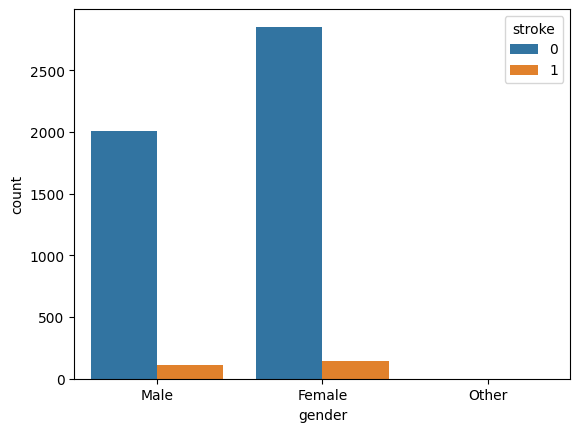

In [30]:
sns.countplot(x='gender', hue='stroke', data=stroke_df)

<Axes: xlabel='smoking_status', ylabel='count'>

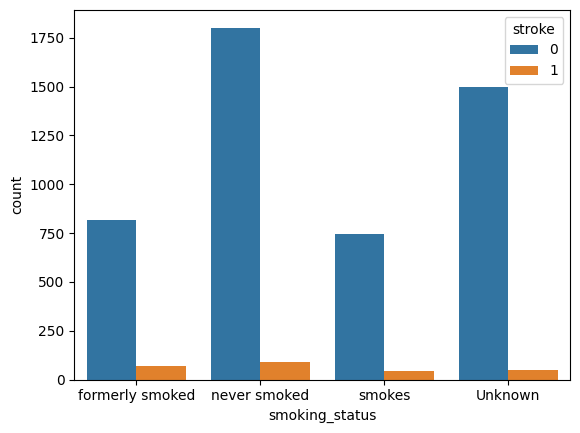

In [31]:
sns.countplot(x='smoking_status', hue='stroke', data=stroke_df)

<Axes: xlabel='work_type', ylabel='count'>

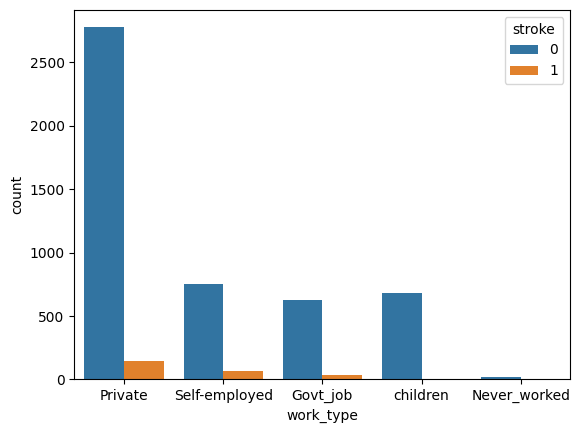

In [32]:
sns.countplot(x='work_type', hue='stroke', data=stroke_df)

### 2. Numerical vs Target variable

<Axes: xlabel='stroke', ylabel='age'>

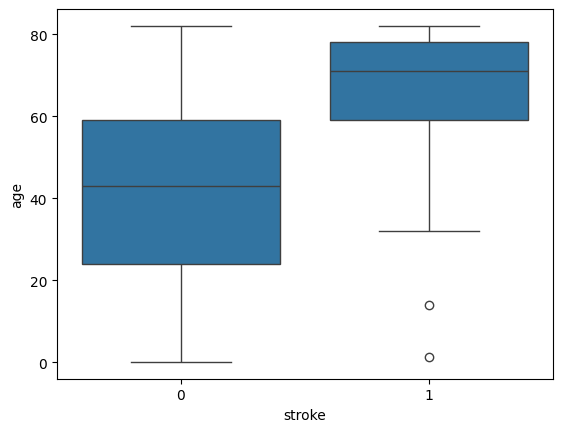

In [33]:
sns.boxplot(x='stroke', y='age', data=stroke_df)

<Axes: xlabel='stroke', ylabel='avg_glucose_level'>

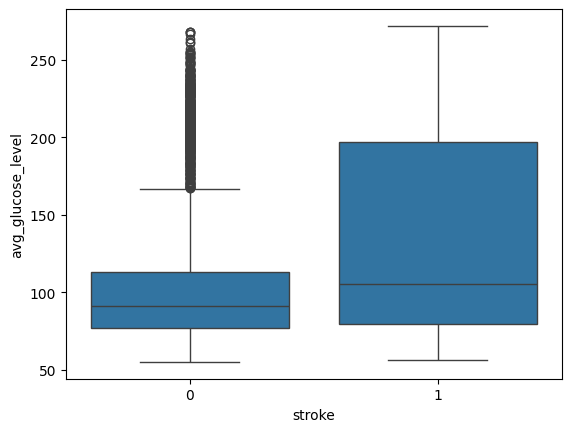

In [34]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=stroke_df)

<Axes: xlabel='stroke', ylabel='bmi'>

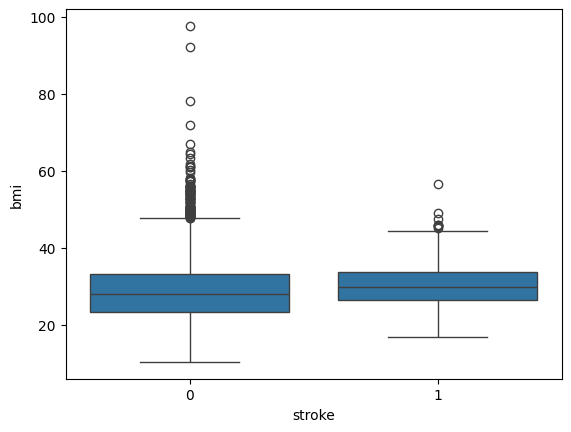

In [35]:
sns.boxplot(x='stroke', y='bmi', data=stroke_df)

## Data imbalance check

In [36]:
stroke_df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

### Visualize relationships

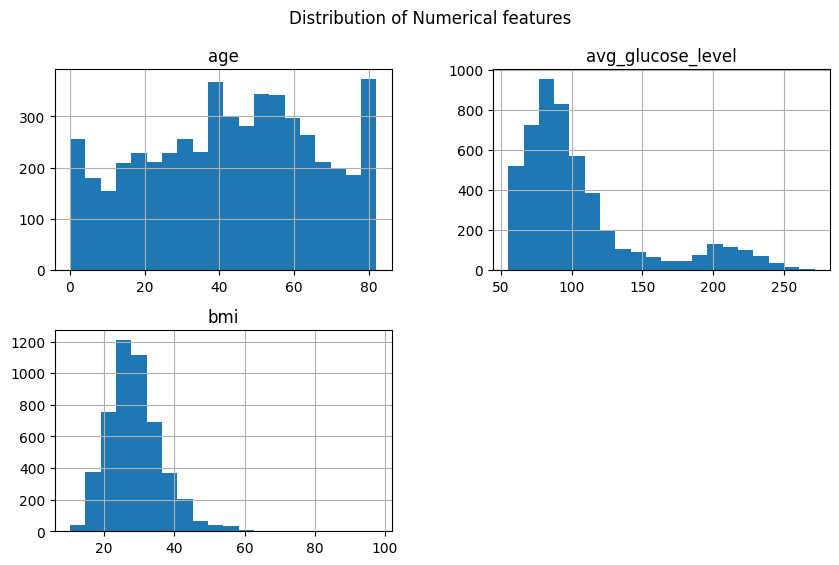

In [37]:
stroke_df[['age', 'avg_glucose_level', 'bmi']].hist(bins=20, figsize=(10,6))
plt.suptitle('Distribution of Numerical features')
plt.show()

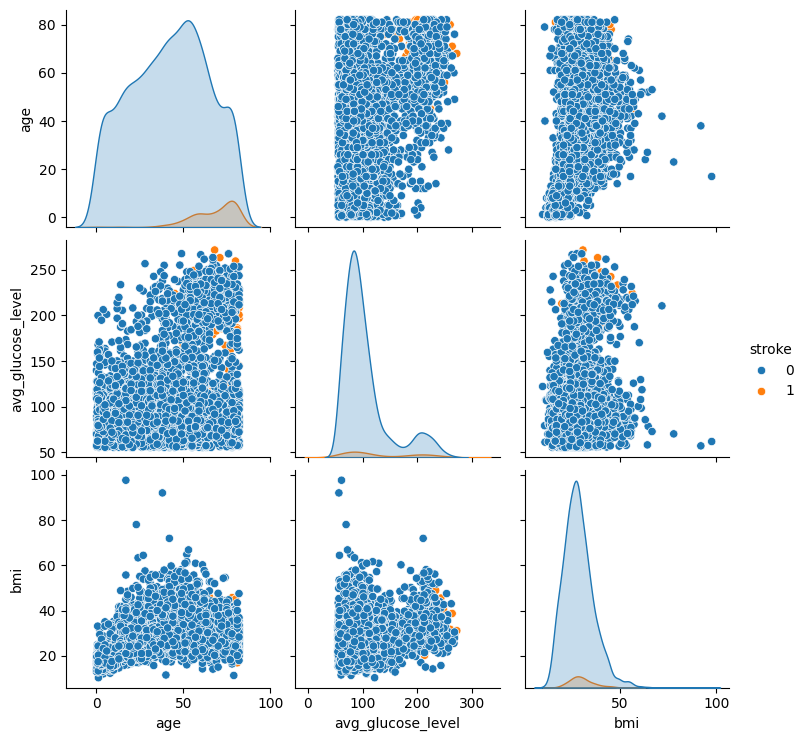

In [38]:
sns.pairplot(stroke_df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke')